In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [17]:
# Use the keras module to import the necessary data 
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [18]:
# This cell should be run inplace of the cell directly above
print(f"np.shape(train_X) ={np.shape(train_X)}")
print(f"np.shape(test_X) = {np.shape(test_X)} \n")
print(f"np.shape(train_X[0]) = {np.shape(train_X[0])}")
print(f"np.shape(test_X[0]) = {np.shape(test_X[0])} \n")

np.shape(train_X) =(60000, 28, 28)
np.shape(test_X) = (10000, 28, 28) 

np.shape(train_X[0]) = (28, 28)
np.shape(test_X[0]) = (28, 28) 



train_y[1] = 0 



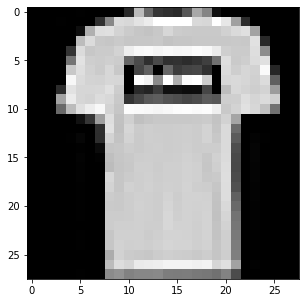

In [19]:
print(f"{train_y[1] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(train_X[1], cmap="gray")
plt.show()

In [20]:
# Scale the data for training. 
train_X = train_X/255
test_X = test_X/255

# Flatten the training images into coloumn vectors. 
flat_train_X = []
# One hot encode the training labels
onehot_train_y = []

for x, y in zip(train_X, train_y):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)
   

# Do the same for the testing data 
flat_test_X = []
onehot_test_y = []

for x, y in zip(test_X, test_y):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_test_y.append(temp_vec)

In [21]:
class DenseNetwork(object):
    def __init__(self, layers = [784, 60, 60, 10]):
        self.layers = layers
        self.W, self.B = self.initialize_weights()

    def initialize_weights(self):
        # The following Python lists will contain numpy matrices
        # connected the layers in the neural network 
        W = [[0.0]]
        B = [[0.0]]
        for i in range(1, len(self.layers)):
            # The scalling factor is something I found in a research paper :)
            w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
            b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])
        
            W.append(w_temp)
            B.append(b_temp)
        return W, B

    def sigmoid(self, z):
        return 1.0/(1.0+np.exp(-z))

    def d_sigmoid(self, z):
        return self.sigmoid(z)*(1.0 - self.sigmoid(z))
    
    def mse(self, a, y):
        return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

    def MSE(self, W, B, X, y):
        cost = 0.0
        m = 0
        for xi, yi in zip(X, y):
            a = self.forward_pass(W, B, xi, predict_vector = True)
            cost += self.mse(a, yi)
            m+=1
        return cost/m
    
    def forward_pass(self, W, B, xi, predict_vector = False):
        Z = [[0.0]]
        A = [xi]
        L = len(W) - 1
        for i in range(1, L + 1):
            z = W[i] @ A[i-1] + B[i]
            Z.append(z)
            
            a = self.sigmoid(z)
            A.append(a)
            
        if predict_vector == False:
            return Z, A
        else:
            return A[-1]
        
    def train(self, X_train, y_train, alpha = 0.1, epochs = 10):
        # Print the initial mean squared error
        self.errors_ = [self.MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        # Find your sample size
        sample_size = len(X_train)

        # Find the number of non-input layers.
        L = len(self.layers) - 1

        # For each epoch perform stochastic gradient descent. 
        for k in range(epochs):
            # Loop over each (xi, yi) training pair of data.
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = self.forward_pass(self.W, self.B, xi)

                # Store the errors in a dictionary for clear interpretation
                # of computation of these values.
                deltas = dict()

                # Compute the output error 
                output_error = (A[L] - yi)*self.d_sigmoid(Z[L])
                deltas[L] = output_error

                # Loop from L-1 to 1. Recall the right entry of the range function 
                # is non-inclusive. 
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*self.d_sigmoid(Z[i])

                # Loop over each hidden layer and the output layer to perform gradient 
                # descent. 
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # Show the user the cost over all training examples
            self.errors_.append(self.MSE(self.W, self.B, X_train, y_train))   
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")
    

    def predict(self, xi):
        depth = len(self.layers)
        _, A = self.forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

MSE(net.W, net.B, flat_train_X, onehot_train_y) = 1.184235010541276 

predicted digit is: 5
actual digit is: 4


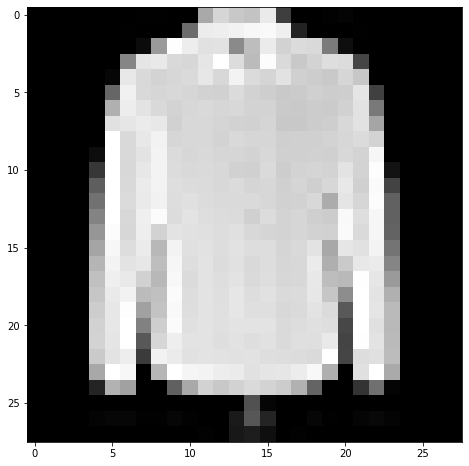

In [22]:
# Initialize a network with 784 input nodes, two hidden layers with 60 nodes each 
# and a output layer with 10 nodes. 
net = DenseNetwork(layers = [784, 120, 145, 120, 10])

# Check the mean squared error before training 
print(f"MSE(net.W, net.B, flat_train_X, onehot_train_y) = {net.MSE(net.W, net.B, flat_train_X, onehot_train_y)} \n")

# Make a random prediction before training
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [23]:
# Train your network with stochastic gradient descent!
net.train(flat_train_X, onehot_train_y)

Starting Cost = 1.184235010541276
1-Epoch Cost = 0.11948019675925106
2-Epoch Cost = 0.10734796228039652
3-Epoch Cost = 0.09778582739763952
4-Epoch Cost = 0.0954458447942968
5-Epoch Cost = 0.09270781102734542
6-Epoch Cost = 0.08980623798156978
7-Epoch Cost = 0.08910181773838728
8-Epoch Cost = 0.08684688831878395
9-Epoch Cost = 0.08695429050388646
10-Epoch Cost = 0.08564450873769681


predicted digit is: 2
actual digit is: 2


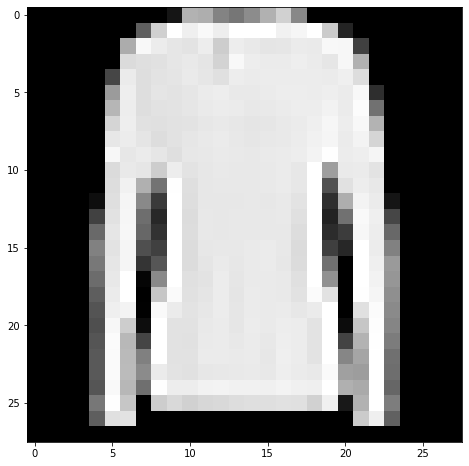

predicted digit is: 7
actual digit is: 7


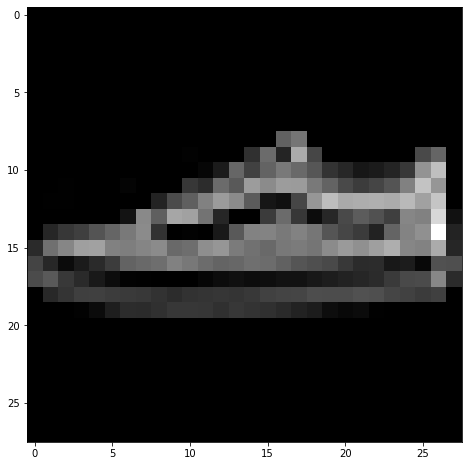

predicted digit is: 4
actual digit is: 4


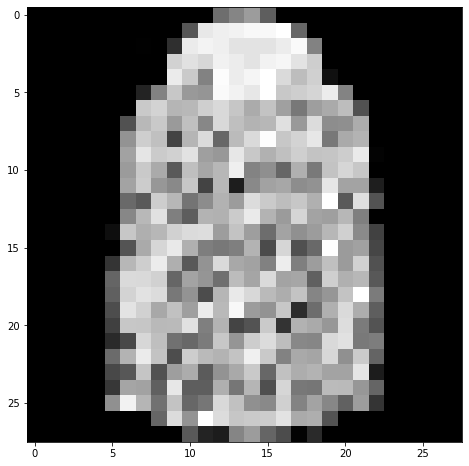

predicted digit is: 7
actual digit is: 9


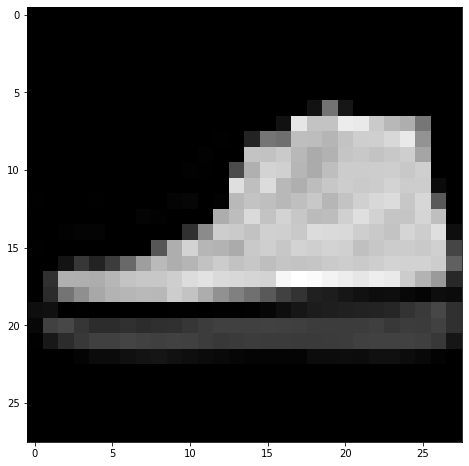

predicted digit is: 9
actual digit is: 9


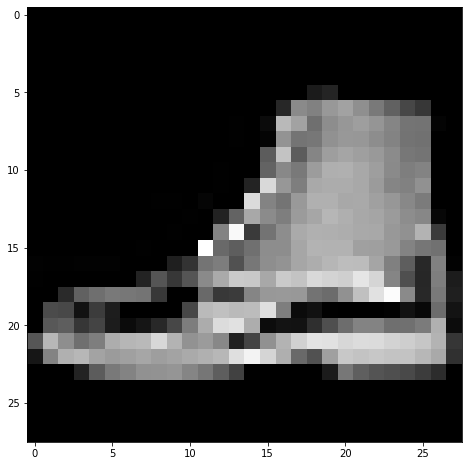

predicted digit is: 8
actual digit is: 8


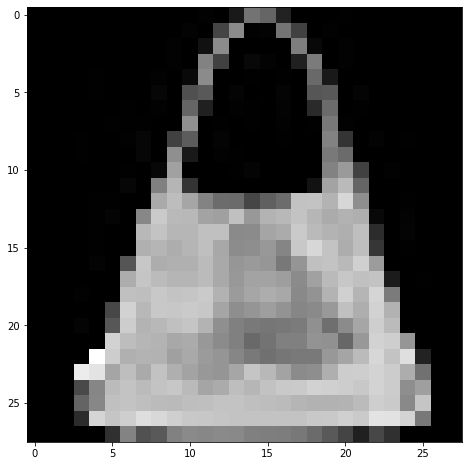

predicted digit is: 8
actual digit is: 8


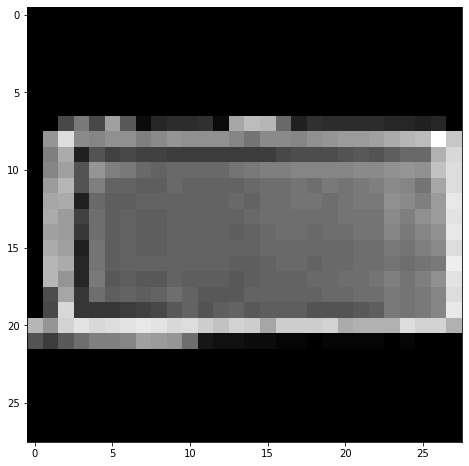

predicted digit is: 2
actual digit is: 2


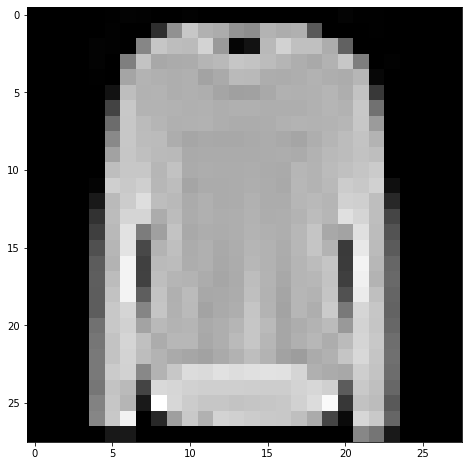

predicted digit is: 8
actual digit is: 8


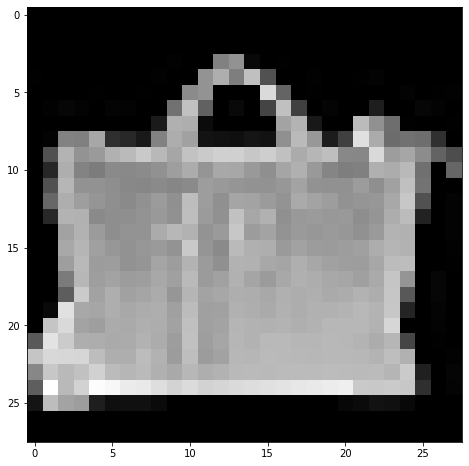

predicted digit is: 5
actual digit is: 5


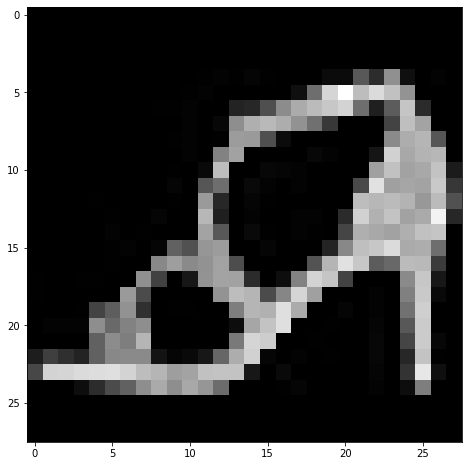

In [27]:
for a in range(10):
    i = np.random.randint(0, len(flat_test_X))
    prediction = net.predict(flat_test_X[i])
    print(f"predicted digit is: {prediction}")
    print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
    plt.figure(figsize=(8, 8))
    plt.imshow(test_X[i], cmap="gray")
    plt.show()

In [25]:
# Compute the classification accuracy of our trained model on the test data (I bet we did well!)
sum([int(net.predict(x) == y) for x, y in zip(flat_test_X, test_y)])/len(onehot_test_y)

0.8569